In [21]:
#This program is to study any spectral register. Should be feeded  the
#specific satellite to be analysed.

#Changes:
# The materials are from 3.*, only four ones
# The satellite is s2A
#


import glob
import os
import csv
from scipy.interpolate import interp1d
import numpy as np
import pylab
from scipy.integrate import fixed_quad
from __future__ import division
import pickle

#MATERIALS
#Extract the files .CSV in the home archive that supposely are the spectrum information 
#of the materials

# create the list of files
materials = glob.glob('materials/*'); 
num_mat=len(materials);

mat_int=[];           #store the intensities of the materials csv files
mat_wl=[];            #store the wavelenght of the materials csv files
name_material=[];     #names of the files where the material's spectrum are

i_mat=0;
for x in materials:
    material=open(x,'rU');
    name_mat=os.path.basename(x).replace('.CSV','');
    name_material.append(name_mat);
    csv_material=csv.reader(material);
    mat_int.append([]);
    mat_wl.append([]);
    for row in csv_material:
        mat_wl[i_mat].append(float(row[0]));
        mat_int[i_mat].append(float(row[1]));
    i_mat+=1;
    material.close();
    
#make continuous the intensity_mat function
f_mat=range(num_mat);
f_mat[:]=[[] for x in f_mat];
for i in range(num_mat):
    f_mat[i]=interp1d(mat_wl[i],mat_int[i]);

#Sensor's radiometry
    
#open the csv file in pyhton

#IN THIS LINE IT IS WRITEN THE DESIRED SATELLITE!!!


responses = glob.glob('responses/s2A*');
num_responses=len(responses);
name_responses=[];
coef_sat=[];
for i in range(num_responses):
    coef_sat.append([]);
i_sat=0;

for x in responses:
    resp=open(x,'rU');
    csv_response=csv.reader(resp);
    name_resp=os.path.basename(x).replace('.csv','');
    name_responses.append(name_resp);
    name_bands=[];
    #Value used to read the titles or first lines of the satellites' spectrums
    safe=0;
    #put the sensor's information in lists
    wavelenght=[];
    for row in csv_response:
        if safe==0:
            #Here assign the name of the bands as well as the number of bands
            num_bands=len(row)-1;
            for i in range(num_bands):
                name_bands.append(row[i+1]);
 #CAMBIO
            band=range(num_bands);
            band[:]=[[] for x in band];
            safe=1;
        else:
            wavelenght.append(float(row[0]));
            for i in range(num_bands):
                band[i].append(float(row[i+1]));  

    #should i to close the file
    resp.close();
 
    #Make continuous the sensors' spectrum
  
#Cambio
    f_sen=range(num_bands);
    f_sen[:]=[[] for x in f_sen];
    for i in range(num_bands):
        f_sen[i]=interp1d(wavelenght,band[i]);

        
    # COEFFICIENTS

    coef=np.zeros((num_mat,num_bands));
    result=range(num_bands);
    #integrate to obtain the coefficients for every material in every band
    for i in range(num_mat):   #count over the materials' spectrum
        for j in range(num_bands):    #count over the satellites bands
            xmin=max(min(wavelenght),min(mat_wl[i]));
            xmax=min(max(wavelenght),max(mat_wl[i]));
        
            #Find the range of integration and write it down in the answer
        
            Result=fixed_quad(lambda x:f_sen[j](x)*f_mat[i](x),xmin,xmax,n=4000);
            print Result
            coef[i,j]=float(Result[0]); 
        coef_max=max(coef[i,:]);
        coef[i,:]/=coef_max;
        #list to store the whole coefficients coef_sat
        coef_sat[i_sat].append(coef[i,:]);
   
    i_sat+=1;
    #Need to store every coef in the folder coefficients

    print coef[i,:]
    
    #MUST i to add a new field to every coef, the name to be identified
    
    

(0.0, None)
(0.0, None)
(0.0, None)
(0.27563179557744238, None)
(0.25357113577519691, None)
(0.42015652646696916, None)
(0.81263507667557622, None)
(1.2839139803703548, None)
(0.27702773376411721, None)
(0.13289570464479514, None)
(4.4540118974587299, None)
(8.5528844385811524, None)
(2.8939176258552664, None)
(0.0, None)
(0.0, None)
(0.0, None)
(15.704615185956294, None)
(6.6933023656546418, None)
(4.7585708519689378, None)
(2.7012191397455911, None)
(4.0494754664771886, None)
(0.30282479346953417, None)
(0.36890451163044996, None)
(2.3396916044891563, None)
(5.7445026746271957, None)
(0.44067010650084576, None)
(0.0, None)
(0.0, None)
(0.0, None)
(21.992205894656401, None)
(10.327949516527026, None)
(7.2798398800415658, None)
(4.2182942780557937, None)
(12.532471746263257, None)
(1.812121194683787, None)
(4.6259538017476913, None)
(3.0561958840210224, None)
(5.8546681147120596, None)
(1.1395597869109826, None)
(0.0, None)
(0.0, None)
(0.0, None)
(1.1098432182787388, None)
(0.83209913

In [19]:
f_ma=range(2);
longitud=len(f_ma);
print num_mat



4


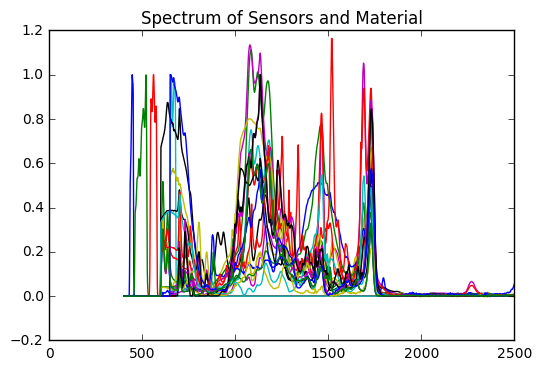

In [22]:

    #Make the figure
xnew=np.linspace(400,2500,num=10000);
for i in range(4):
    pylab.plot(xnew,f_sen[i](xnew));

for i in range(num_mat):
    pylab.plot(xnew,f_mat[i](xnew));
# pylab.plot(xnew,f_mat[3](xnew));
pylab.title("Spectrum of Sensors and Material");
pylab.legend(loc='lower right');

pylab.show()
